In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# E-Commerce Data 
## Task : to make cluster basis RMF approach

In [ ]:
df = pd.read_csv(r"data.csv")

### Data Preprocessing
1. Handle missing and duplicate values.
2. Convert date and time columns to appropriate formats.
3. Aggregate data to calculate RFM metrics per customer.

In [ ]:
# check duplicate data
df.duplicated().sum()

3145

In [ ]:
df.shape

(541116, 12)

In [ ]:
df = df.drop_duplicates(ignore_index=True)
df.shape

(537971, 12)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()/len(df)*100

CustomerID            24.869370
Item Code              0.000186
InvoieNo               0.000186
Date of purchase       0.000186
Quantity               0.000186
Time                   0.000186
price per Unit         0.000186
Price                  0.000186
Shipping Location      0.000186
Cancelled_status      98.448801
Reason of return      99.999442
Sold as set          100.000000
dtype: float64

In [ ]:
df.columns

Index(['CustomerID', 'Item Code', 'InvoieNo', 'Date of purchase', 'Quantity',
       'Time', 'price per Unit', 'Price', 'Shipping Location',
       'Cancelled_status', 'Reason of return', 'Sold as set'],
      dtype='object')

In [ ]:
df = df[['CustomerID','InvoieNo', 'Date of purchase','Price']]
df.head()

,CustomerID,InvoieNo,Date of purchase,Price
0,4355.0,398177.0,29-10-2017,1926.0
1,4352.0,394422.0,05-10-2017,1740.0
2,4352.0,394422.0,12-10-2017,1866.0
3,4352.0,388633.0,22-08-2017,1869.0
4,4352.0,394422.0,10-10-2017,1888.0


In [ ]:
df.isnull().sum()/len(df)*100

CustomerID          24.869370
InvoieNo             0.000186
Date of purchase     0.000186
Price                0.000186
dtype: float64

In [ ]:
df = df.dropna(subset=['CustomerID'])
df.isnull().sum()

CustomerID          0
InvoieNo            0
Date of purchase    0
Price               0
dtype: int64

In [ ]:
df.shape

(404181, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404181 entries, 0 to 537940
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   CustomerID        404181 non-null  float64
 1   InvoieNo          404181 non-null  float64
 2   Date of purchase  404181 non-null  object 
 3   Price             404181 non-null  float64
dtypes: float64(3), object(1)
memory usage: 15.4+ MB


In [ ]:
df['Date of purchase'] = pd.to_datetime(df['Date of purchase'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404181 entries, 0 to 537940
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   CustomerID        404181 non-null  float64       
 1   InvoieNo          404181 non-null  float64       
 2   Date of purchase  404181 non-null  datetime64[ns]
 3   Price             404181 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 15.4 MB


In [ ]:
df.head()

,CustomerID,InvoieNo,Date of purchase,Price
0,4355.0,398177.0,2017-10-29,1926.0
1,4352.0,394422.0,2017-10-05,1740.0
2,4352.0,394422.0,2017-10-12,1866.0
3,4352.0,388633.0,2017-08-22,1869.0
4,4352.0,394422.0,2017-10-10,1888.0


In [ ]:
df.columns

Index(['CustomerID', 'InvoieNo', 'Date of purchase', 'Price'], dtype='object')

In [ ]:
df = df.rename(columns = {"InvoieNo":"InvoiceNo", "Date of purchase":"Date"})
df.head()

,CustomerID,InvoiceNo,Date,Price
0,4355.0,398177.0,2017-10-29,1926.0
1,4352.0,394422.0,2017-10-05,1740.0
2,4352.0,394422.0,2017-10-12,1866.0
3,4352.0,388633.0,2017-08-22,1869.0
4,4352.0,394422.0,2017-10-10,1888.0


In [ ]:
df['Date'].describe()

count                           404181
mean     2017-07-15 15:28:28.388073472
min                2016-12-02 00:00:00
25%                2017-04-12 00:00:00
50%                2017-08-05 00:00:00
75%                2017-10-26 00:00:00
max                2017-12-19 00:00:00
Name: Date, dtype: object

In [ ]:
import datetime

In [ ]:
new_date = datetime.datetime(2017,12,20)
new_date

datetime.datetime(2017, 12, 20, 0, 0)

### RFM Calculation
1. **Recency**: Number of days since the last purchase.
2. **Frequency**: Total number of transactions.
3. **Monetary**: Total amount spent by the customer.

In [ ]:
df['CustomerID'].nunique()

4349

In [ ]:
df['CustomerID'].value_counts()

CustomerID
4043.0    7970
1896.0    5874
1301.0    5099
331.0     4615
1675.0    2779
          ... 
2198.0       1
3209.0       1
2251.0       1
3127.0       1
3244.0       1
Name: count, Length: 4349, dtype: int64

In [ ]:
df.columns

Index(['CustomerID', 'InvoiceNo', 'Date', 'Price'], dtype='object')

In [ ]:
# Creating pi-vot table basis customer insight
RMFApproach = df.groupby('CustomerID').agg({'Date': lambda x: (new_date - x.max()).days,
                                            'InvoiceNo' : lambda x: x.count(),
                                            'Price': lambda x: x.sum()})

RMFApproach.reset_index()

,CustomerID,Date,InvoiceNo,Price
0,2.0,4,182,553704.0
1,3.0,77,27,257404.0
2,4.0,19,72,176613.0
3,5.0,311,16,41976.0
4,6.0,37,84,151822.0
...,...,...,...,...
4344,4368.0,278,10,20480.0
4345,4369.0,181,7,10774.0
4346,4370.0,9,13,24962.0
4347,4371.0,4,754,280608.0


In [ ]:
RMFApproach.rename(columns = {'Date':'Recency', 'InvoiceNo':'Frequency',
                              'Price':'Monetory'}, inplace=True)

In [ ]:
RMFApproach.reset_index()

,CustomerID,Recency,Frequency,Monetory
0,2.0,4,182,553704.0
1,3.0,77,27,257404.0
2,4.0,19,72,176613.0
3,5.0,311,16,41976.0
4,6.0,37,84,151822.0
...,...,...,...,...
4344,4368.0,278,10,20480.0
4345,4369.0,181,7,10774.0
4346,4370.0,9,13,24962.0
4347,4371.0,4,754,280608.0


In [ ]:
RMFApproach.describe()

,Recency,Frequency,Monetory
count,4349.000000,4349.000000,4.349000e+03
mean,93.299379,92.936537,2.299380e+05
std,100.701315,232.086935,8.572589e+05
min,1.000000,1.000000,-5.037200e+04
25%,18.000000,17.000000,3.814800e+04
50%,51.000000,42.000000,8.365500e+04
75%,144.000000,101.000000,2.056120e+05
max,381.000000,7970.000000,3.553619e+07


In [ ]:
quantile = RMFApproach.quantile(q=[0.25, 0.50, 0.75])
quantile = quantile.to_dict()
quantile

{'Recency': {0.25: 18.0, 0.5: 51.0, 0.75: 144.0},
 'Frequency': {0.25: 17.0, 0.5: 42.0, 0.75: 101.0},
 'Monetory': {0.25: 38148.0, 0.5: 83655.0, 0.75: 205612.0}}

In [ ]:
def recency_value(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <=d[p][0.75]:
        return 3
    else:
        return 4

In [ ]:
def freq_monetory_value(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [ ]:
RMFApproach.columns

Index(['Recency', 'Frequency', 'Monetory'], dtype='object')

In [ ]:
RMFApproach['R'] = RMFApproach['Recency'].apply(recency_value, args=('Recency', quantile))
RMFApproach['F'] = RMFApproach['Frequency'].apply(freq_monetory_value, args=('Frequency', quantile))
RMFApproach['M'] = RMFApproach['Monetory'].apply(freq_monetory_value, args=('Monetory', quantile))

In [ ]:
RMFApproach.reset_index()

,CustomerID,Recency,Frequency,Monetory,R,F,M
0,2.0,4,182,553704.0,1,1,1
1,3.0,77,27,257404.0,3,3,1
2,4.0,19,72,176613.0,2,2,2
3,5.0,311,16,41976.0,4,4,3
4,6.0,37,84,151822.0,2,2,2
...,...,...,...,...,...,...,...
4344,4368.0,278,10,20480.0,4,4,4
4345,4369.0,181,7,10774.0,4,4,4
4346,4370.0,9,13,24962.0,1,4,4
4347,4371.0,4,754,280608.0,1,1,1


In [ ]:
RMFApproach['RFM'] = RMFApproach[['R','F', 'M']].sum(axis=1)
RMFApproach.reset_index()

,CustomerID,Recency,Frequency,Monetory,R,F,M,RFM
0,2.0,4,182,553704.0,1,1,1,3
1,3.0,77,27,257404.0,3,3,1,7
2,4.0,19,72,176613.0,2,2,2,6
3,5.0,311,16,41976.0,4,4,3,11
4,6.0,37,84,151822.0,2,2,2,6
...,...,...,...,...,...,...,...,...
4344,4368.0,278,10,20480.0,4,4,4,12
4345,4369.0,181,7,10774.0,4,4,4,12
4346,4370.0,9,13,24962.0,1,4,4,9
4347,4371.0,4,754,280608.0,1,1,1,3


In [ ]:
RMFApproach['RFM'].value_counts()

RFM
10    507
3     471
7     460
9     458
8     447
5     438
12    410
6     406
11    380
4     372
Name: count, dtype: int64

In [ ]:
Loyality_level = ['Platinum', 'Gold', 'Silver', 'Bronze']
score_cuts = pd.qcut(RMFApproach.RFM, q=4, labels = Loyality_level)
RMFApproach['Loyality_level'] = score_cuts.values
RMFApproach = RMFApproach.reset_index()
RMFApproach

,CustomerID,Recency,Frequency,Monetory,R,F,M,RFM,Loyality_level
0,2.0,4,182,553704.0,1,1,1,3,Platinum
1,3.0,77,27,257404.0,3,3,1,7,Gold
2,4.0,19,72,176613.0,2,2,2,6,Gold
3,5.0,311,16,41976.0,4,4,3,11,Bronze
4,6.0,37,84,151822.0,2,2,2,6,Gold
...,...,...,...,...,...,...,...,...,...
4344,4368.0,278,10,20480.0,4,4,4,12,Bronze
4345,4369.0,181,7,10774.0,4,4,4,12,Bronze
4346,4370.0,9,13,24962.0,1,4,4,9,Silver
4347,4371.0,4,754,280608.0,1,1,1,3,Platinum


In [ ]:
RMFApproach.RFM

CustomerID
2.0        3
3.0        7
4.0        6
5.0       11
6.0        6
          ..
4368.0    12
4369.0    12
4370.0     9
4371.0     3
4372.0     5
Name: RFM, Length: 4349, dtype: int64

In [ ]:
RMFApproach['Loyality_level'].value_counts()

Loyality_level
Gold        1313
Platinum    1281
Silver       965
Bronze       790
Name: count, dtype: int64

In [ ]:
RMFApproach.columns

Index(['CustomerID', 'Recency', 'Frequency', 'Monetory', 'R', 'F', 'M', 'RFM',
       'Loyality_level'],
      dtype='object')

In [ ]:
RMFApproach.to_csv("final_analysis.csv")

In [ ]:
final_report = RMFApproach.groupby('Loyality_level')[['Recency', 'Frequency',
                                                      'Monetory','CustomerID']].agg({'Recency':'sum', 'Frequency':'sum',
                                                                                     'Monetory':'sum','CustomerID':'nunique'}).reset_index()

In [ ]:
final_report

,Loyality_level,Recency,Frequency,Monetory,CustomerID
0,Platinum,25988,295781,764912338.0,1281
1,Gold,84082,76027,166230918.0,1313
2,Silver,121757,23778,50300946.1,965
3,Bronze,173932,8595,18556145.0,790


In [ ]:
final_report = final_report.rename(columns= {'CustomerID': 'NumBuyers'})

In [ ]:
final_report

,Loyality_level,Recency,Frequency,Monetory,NumBuyers
0,Platinum,25988,295781,764912338.0,1281
1,Gold,84082,76027,166230918.0,1313
2,Silver,121757,23778,50300946.1,965
3,Bronze,173932,8595,18556145.0,790


In [ ]:
final_report['Percent'] = round(final_report['NumBuyers']/final_report.NumBuyers.sum()*100,2)

In [ ]:
final_report

,Loyality_level,Recency,Frequency,Monetory,NumBuyers,Percent
0,Platinum,25988,295781,764912338.0,1281,29.46
1,Gold,84082,76027,166230918.0,1313,30.19
2,Silver,121757,23778,50300946.1,965,22.19
3,Bronze,173932,8595,18556145.0,790,18.17


In [ ]:
final_report.columns

Index(['Loyality_level', 'Recency', 'Frequency', 'Monetory', 'NumBuyers',
       'Percent'],
      dtype='object')

In [ ]:
final_report1 = final_report[['Loyality_level', 'NumBuyers','Percent']]
final_report1

,Loyality_level,NumBuyers,Percent
0,Platinum,1281,29.46
1,Gold,1313,30.19
2,Silver,965,22.19
3,Bronze,790,18.17


# Visualization

In [ ]:
import squarify

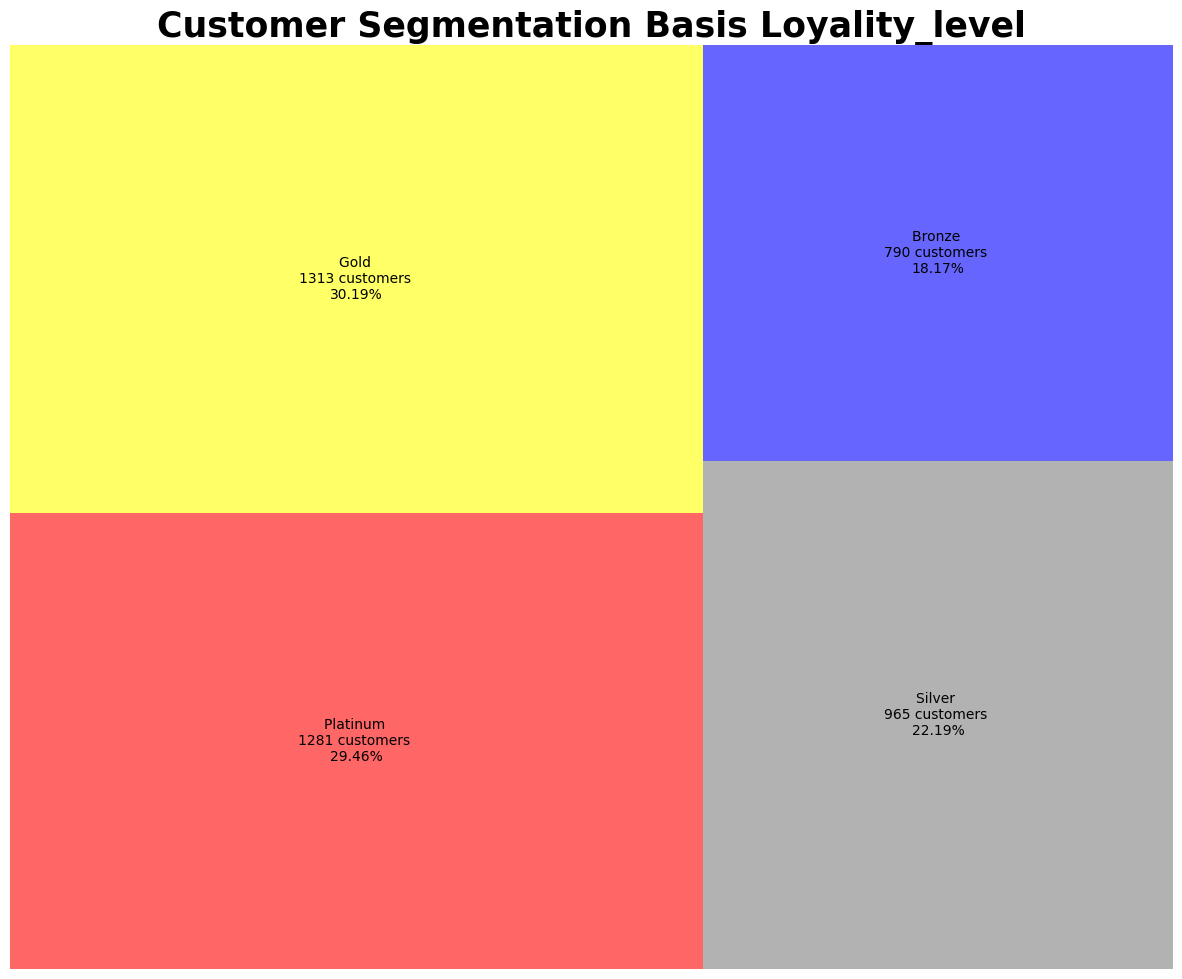

In [ ]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(15,12)

colors_dics = {'Platinum':'red', 'Gold':'yellow', 'silver':'gray', 'bronze':'blue'}

squarify.plot(sizes=final_report1['NumBuyers'],color = colors_dics.values(),
              label = ['{} \n{:0.0f} customers \n{}%'.format(*final_report1.iloc[i])
                       for i in range(0, len(final_report1))], alpha=0.6)

plt.title("Customer Segmentation Basis Loyality_level", fontsize=25, fontweight="bold")
plt.axis("off")
plt.show()

### Insights
- Visualize clusters to interpret customer groups.
- Use segmentation results to inform marketing strategies.

# kmeans cluster

### Clustering Using K-Means
1. Normalize RFM metrics.
2. Use K-Means to identify customer segments.

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
RMFApproach.head()

,CustomerID,Recency,Frequency,Monetory,R,F,M,RFM,Loyality_level
0,2.0,4,182,553704.0,1,1,1,3,Platinum
1,3.0,77,27,257404.0,3,3,1,7,Gold
2,4.0,19,72,176613.0,2,2,2,6,Gold
3,5.0,311,16,41976.0,4,4,3,11,Bronze
4,6.0,37,84,151822.0,2,2,2,6,Gold


In [ ]:
RMFApproach.columns

Index(['CustomerID', 'Recency', 'Frequency', 'Monetory', 'R', 'F', 'M', 'RFM',
       'Loyality_level'],
      dtype='object')

In [ ]:
x = RMFApproach[['Recency', 'Frequency', 'Monetory']]
x

,Recency,Frequency,Monetory
0,4,182,553704.0
1,77,27,257404.0
2,19,72,176613.0
3,311,16,41976.0
4,37,84,151822.0
...,...,...,...
4344,278,10,20480.0
4345,181,7,10774.0
4346,9,13,24962.0
4347,4,754,280608.0


In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(x)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
print("labels :", labels)
print()
print("centroids :", centroids)

labels : [0 0 0 ... 0 0 0]

centroids : [[9.43828598e+01 8.20496041e+01 1.66799945e+05]
 [6.72727273e+00 1.49918182e+03 1.05443873e+07]
 [9.34883721e+00 7.74790698e+02 3.07527742e+06]
 [3.00000000e+00 2.05300000e+03 3.55361940e+07]]


In [ ]:
pd.DataFrame(labels).value_counts()

0    4294
2      43
1      11
3       1
Name: count, dtype: int64